# 加载数据集

In [1]:
from keras.datasets import mnist

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
(X_train,y_train), (X_test,y_test)= mnist.load_data()

In [3]:
print (X_train.shape)
print (y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

# 打乱数据集

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [37]:
X_train.shape

(60000, 28, 28)

查看图象

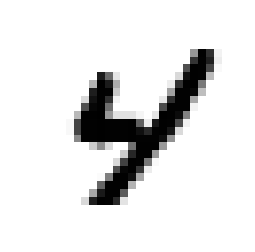

In [38]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[1000]
plt.imshow(some_digit, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y_train[1000]

4

# 二分类
判断是不是数字5

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5) 

In [12]:
X_train_reshape=X_train.reshape(60000,-1)

In [13]:
y_train_5.shape

(60000,)

##  训练模型

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_reshape, y_train_5)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([X_train_reshape[10000]])

array([False])

## 交叉验证

In [16]:
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_val_score
y_train_pred = cross_val_predict(sgd_clf, X_train_reshape, y_train_5, cv=3)
cross_val_score(sgd_clf, X_train_reshape, y_train_5, cv=3)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

array([0.95545, 0.83265, 0.958  ])

## 查准率和查全率（Precision and Recall ）

In [17]:
from sklearn.metrics import precision_score, recall_score

print (precision_score(y_train_5, y_train_pred))
print (recall_score(y_train_5, y_train_pred))

0.5189859404406066
0.8647850950009224


### F1 指标， 调和平均值

In [18]:
from sklearn.metrics import f1_score 
f1_score(y_train_5, y_train_pred)

0.6486785664867856

In [19]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train_reshape, y_train_5, cv=3, method="decision_function") 
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

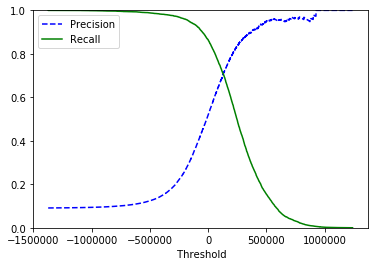

In [20]:
# 画图时precision和recalss的元素比threholds多一个 ，所以徐亚回退一个
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls ,thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    plt.xlabel( ' Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim( [0,1])
plot_precision_recall_vs_threshold( precisions,recalls,thresholds)
plt.show()

# 多分类
将二分类器拓展到多分类器有2种方法：
1. OVA(one versus all ) 数字0-9 ， 训练10个分类器，每个分类器最后算出一个得分，判定最高分的分为那一类
2. OVO （one vsrsus one）每个类之间训练1个分类器，比如0-1 训练一个，1-3训练一个

sklearn 默认用 OVA

In [21]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier( random_state= 42)
sgd_clf.fit( X_train_reshape, y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [22]:
# 查看得分

some_digit =X_train_reshape[10]
sgd_clf.predict([some_digit])


array([7], dtype=uint8)

In [23]:
 sgd_clf.decision_function([some_digit])


array([[-513100.85149585, -321854.76155861, -261936.45705799,
        -134174.04370329, -644592.27031191, -553295.36412858,
        -961732.00603131,  325117.44141354, -175050.44159914,
        -239014.993015  ]])

# 评价分类器的好坏

In [24]:
# 采用交叉验证法（ 通过准确率） 来评价
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_reshape, y_train,cv = 3 ,scoring='accuracy')

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

array([0.86417716, 0.78143907, 0.84577687])

## 错误分析
混淆矩阵法 ：第 i 行第 j 列的数字代表数字 i 被预测为数字 j 的个数总和， 比如第5行第一个数表示数字4被误判为0的次数为75， 对角线为正确分类

In [29]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [30]:
y_train_pred = cross_val_predict( sgd_clf, X_train_reshape, y_train, cv =5)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\stoc

In [33]:
conf_mx = confusion_matrix( y_train,y_train_pred)
conf_mx

array([[5726,    1,   63,   11,    6,   40,   16,   13,   40,    7],
       [   2, 6232,  114,   33,   12,   47,    6,   20,  266,   10],
       [  85,   53, 5359,   78,   62,   33,   41,   81,  155,   11],
       [  70,   31,  369, 4888,   15,  378,   15,  101,  157,  107],
       [  38,   19,   53,   35, 5163,   46,   23,   53,  185,  227],
       [ 141,   25,   95,  220,   85, 4466,   83,   39,  213,   54],
       [  82,   24,  155,    9,   60,  184, 5305,   12,   83,    4],
       [  79,   19,  114,   47,   48,   16,    8, 5687,   41,  206],
       [ 106,  103,  259,  171,   76,  364,   36,   55, 4594,   87],
       [  97,    8,   66,  140,  365,  156,    2,  524,  151, 4440]],
      dtype=int64)

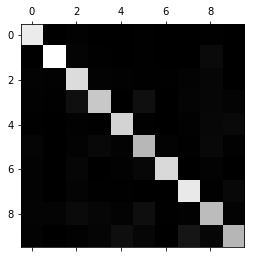

In [39]:
# 3, 5, 10 比较暗，说明这3个数字被分类的比较差
plt.matshow(conf_mx,cmap = plt.cm.gray);plt.show()

In [45]:
row_sums =conf_mx.sum(axis=1, keepdims=True)

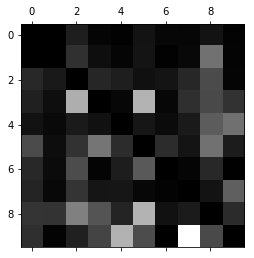

In [51]:
norm_conf_mx = conf_mx/ row_sums.astype(np.float64)
np.fill_diagonal(norm_conf_mx,0)
plt.matshow( norm_conf_mx, cmap = plt.cm.gray);plt.show()

第6行第4列与第4行第6列种比较白，说明5错分为3，3错分为5的次数比较多； 第9行第7列更亮,说明9分错为7的最多

## 多标签分类

将数据分为多个类

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
y_train_large = (y_train >=7)
y_train_odd = ( y_train %2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [56]:
y_multilabel

array([[False,  True],
       [ True, False],
       [False, False],
       ...,
       [False, False],
       [False,  True],
       [ True,  True]])

In [59]:
knn_clf = KNeighborsClassifier() 
knn_clf.fit(X_train_reshape, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [62]:
knn_clf.predict([X_train_reshape[10000]])

array([[False, False]])

# An MNIST Classifier With Over 97% Accuracy

In [84]:
from keras.datasets import mnist
from sklearn.model_selection import GridSearchCV
(X_train,y_train), (X_test,y_test)= mnist.load_data()
from sklearn.neighbors import KNeighborsClassifier

In [85]:
param_grid = [ {'weights' : ['uniform','distance'],'n_neighbors':[3,4,5,6]} ]
knn_clf = KNeighborsClassifier() 
grid_search = GridSearchCV(knn_clf, param_grid, cv = 5, verbose=5, n_jobs=-1)